<h3 
    align="center" 
    style="font-size: 35px; padding:20px; font-family:Georgia; text-align:center; display:block; border-radius:35px;background-color:#FFDE00">
    <span style="color: black;">  🎬 IMDB Movies Rating Prediction 🎬 </span>
</h3>

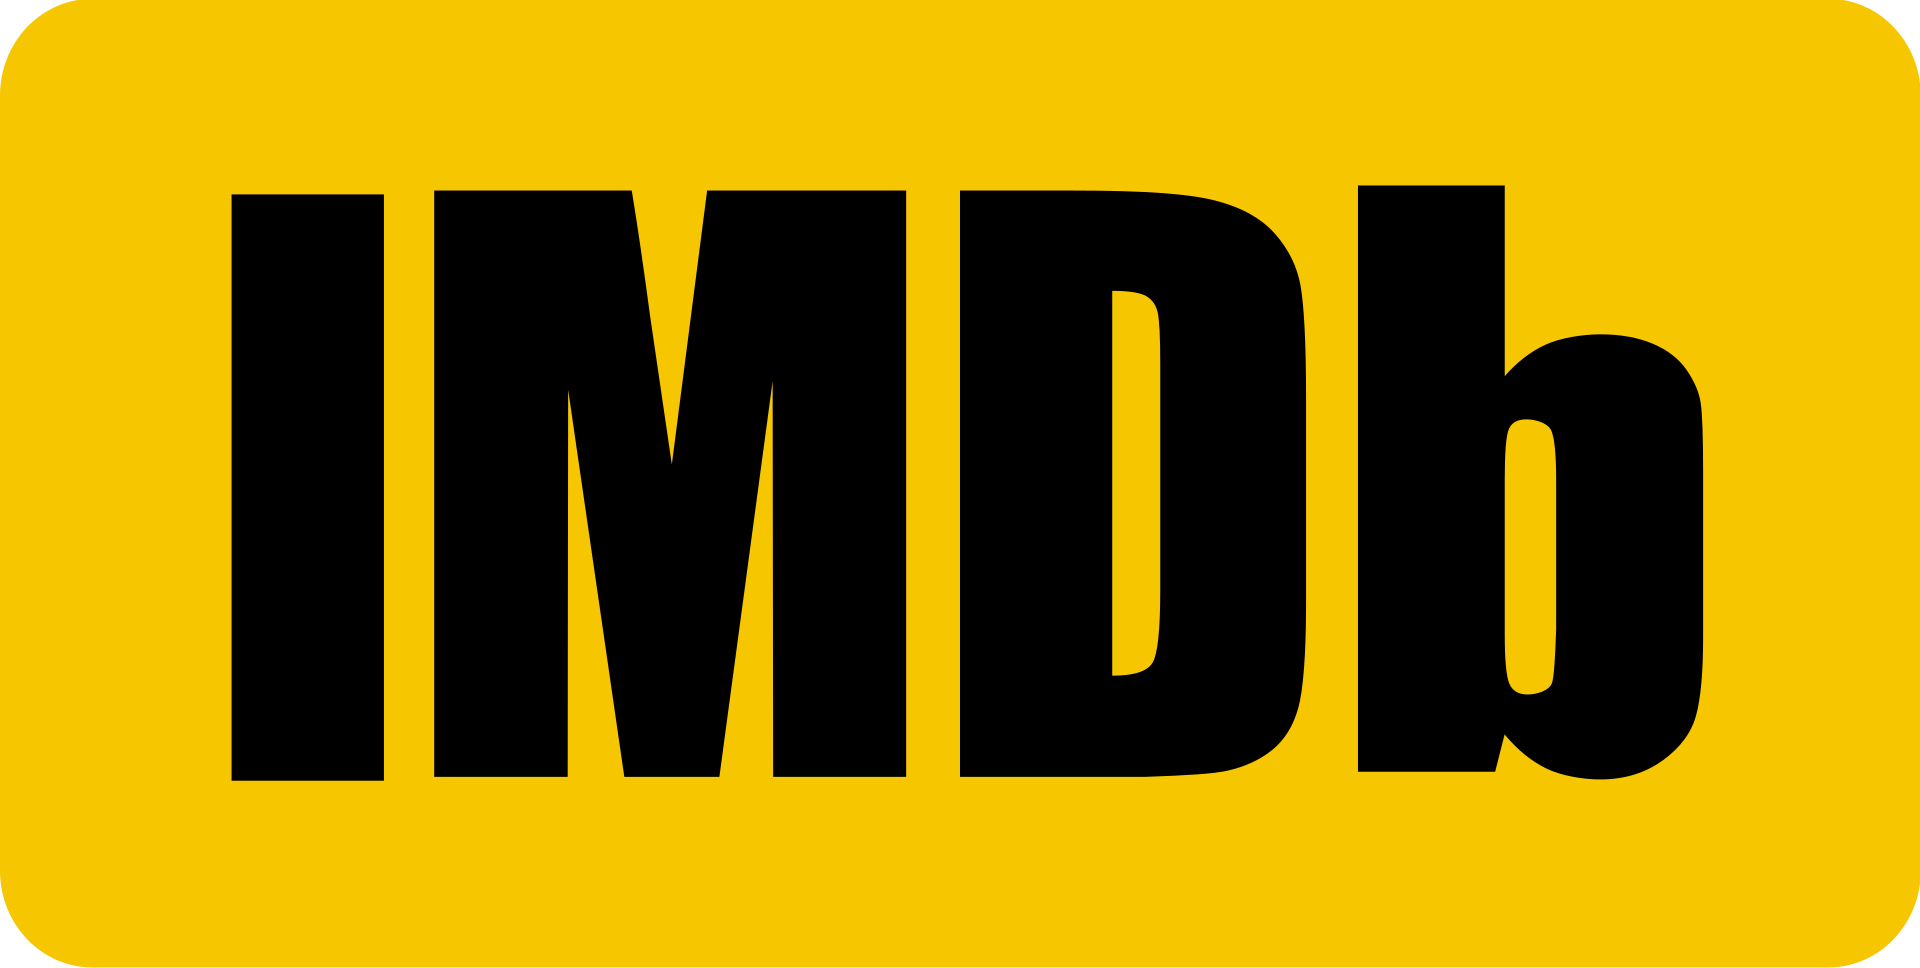

<h3 
    align="center" 
    style="font-size: 35px; padding:20px; font-family:Georgia; text-align:center; display:block; border-radius:30px;background-color:#FFDE00">
    <span style="color: black;">📚 Importing Libraries 📚 </span>
</h3>

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
colors = ['#235E72']

from sklearn.model_selection import train_test_split, cross_val_score

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import accuracy_score, mean_absolute_error, mean_squared_error, r2_score

import warnings
warnings.filterwarnings('ignore')

<h3 
    align="center" 
    style="font-size: 35px; padding:20px; font-family:Georgia; text-align:center; display:block; border-radius:30px;background-color:#FFDE00">
    <span style="color: black;">⏳ Loading the dataset ⏳</span>
</h3>

In [ ]:
imdb = pd.read_csv("../input/imdb-india-movies/IMDb Movies India.csv", encoding='latin-1')
imdb.head()

<h3 
    align="center" 
    style="font-size: 35px; padding:20px; font-family:Georgia; text-align:center; display:block; border-radius:30px;background-color:#FFDE00">
    <span style="color: black;">🧠 Understanding of data 🧠</span>
</h3>

In [ ]:
imdb.head()

In [ ]:
imdb.info()

<h3 
    align="center" 
    style="font-size: 35px; padding:20px; font-family:Georgia; text-align:center; display:block; border-radius:30px;background-color:#FFDE00">
    <span style="color: black;">🧹 Data Cleaning 🧹</span>
</h3>

In [ ]:
# Checking null values

imdb.isna().sum()

In [ ]:
# Locating rows with missing values in columns from 1 to 9

nulls = imdb[imdb.iloc[:, 1:9].isna().all(axis=1)]
nulls.head()

In [ ]:
#Checking if there are any typos

for col in imdb.select_dtypes(include = "object"):
    print(f"Name of Column: {col}")
    print(imdb[col].unique())
    print('\n', '-'*60, '\n')

In [ ]:
# Handling the null values
imdb.dropna(subset=['Name', 'Year', 'Duration', 'Rating', 'Votes', 'Director', 'Actor 1', 'Actor 2', 'Actor 3'], inplace=True)

#Extracting only the text part from the Name column
imdb['Name'] = imdb['Name'].str.extract('([A-Za-z\s\'\-]+)')

# Replacing the brackets from year column as observed above
imdb['Year'] = imdb['Year'].str.replace(r'[()]', '', regex=True).astype(int)

# Convert 'Duration' to numeric and replacing the min, while keeping only numerical part
imdb['Duration'] = pd.to_numeric(imdb['Duration'].str.replace(r' min', '', regex=True), errors='coerce')

# Splitting the genre by , to keep only unique genres and replacing the null values with mode
imdb['Genre'] = imdb['Genre'].str.split(', ')
imdb = imdb.explode('Genre')
imdb['Genre'].fillna(imdb['Genre'].mode()[0], inplace=True)

# Convert 'Votes' to numeric and replace the , to keep only numerical part
imdb['Votes'] = pd.to_numeric(imdb['Votes'].str.replace(',', ''), errors='coerce')

In [ ]:
#checking duplicate values by Name and Year

duplicate = imdb.groupby(['Name', 'Year']).filter(lambda x: len(x) > 1)
duplicate.head(5)

In [ ]:
# Dropping the duplicated values by Name
imdb = imdb.drop_duplicates(subset=['Name'], keep=False)

<div style="border-radius:10px; border:#000000 solid; padding: 15px; background-color: ##F0E68C ; font-size:100%; text-align:left">

<h3 align="left"><font color=black>📊 Insights:</font></h3>

* **Every column had null values** except name column
* We also found that the following columns: **Name, Year, Duration, Genre, and Votes had typos that were corrected later**
* The null values in most of the columns were **dropped and for Genre, it was filled with the mode value**
* Later, we checked the duplicated values and **dropped them based on Name column**

<h3 
    align="center" 
    style="font-size: 35px; padding:20px; font-family:Georgia; text-align:center; display:block; border-radius:30px;background-color:#FFDE00">
    <span style="color: black;">📊 Exploratory Data Analysis 📊</span>
</h3>

---
### Descriptive Analysis
---

In [ ]:
imdb.describe()

In [ ]:
imdb.describe(include = 'O')

In [ ]:
# Find the row with the highest number of votes
max_votes_row = imdb[imdb['Votes'] == imdb['Votes'].max()]

# Get the name of the movie with the highest votes
movie_highest_votes = max_votes_row['Name'].values[0]

# Find the number of votes for the movie with the highest votes
votes_highest_votes = max_votes_row['Votes'].values[0]

print("Movie with the highest votes:", movie_highest_votes)
print("Number of votes for the movie with the highest votes:", votes_highest_votes)
print('\n', '='*100, '\n')


# Find the row with the lowest number of votes
min_votes_row = imdb[imdb['Votes'] == imdb['Votes'].min()]

# Get the name of the movie with the lowest votes
movie_lowest_votes = min_votes_row['Name'].values[0]

# Find the number of votes for the movie with the lowest votes
votes_lowest_votes = min_votes_row['Votes'].values[0]

print("Movie with the highest votes:", movie_lowest_votes)
print("Number of votes for the movie with the highest votes:", votes_lowest_votes)

In [ ]:
# Find the row with the highest rating
max_rating_row = imdb[imdb['Rating'] == imdb['Rating'].max()]
movie_highest_rating = max_rating_row['Name'].values[0]
votes_highest_rating = max_rating_row['Votes'].values[0]

print("Movie with the highest rating:", movie_highest_rating)
print("Number of votes for the movie with the highest rating:", votes_highest_rating)
print('\n', '='*100, '\n')


# Find the row with the lowest rating
min_rating_row = imdb[imdb['Rating'] == imdb['Rating'].min()]
movie_lowest_rating = min_rating_row['Name'].values[0]
votes_lowest_rating = min_rating_row['Votes'].values[0]

print("Movie with the highest rating:", movie_lowest_rating)
print("Number of votes for the movie with the highest rating:", votes_lowest_rating)

In [ ]:
# Group the dataset by the 'Director' column and count the number of movies each director has directed
director_counts = imdb['Director'].value_counts()

# Find the director with the highest number of movies directed
most_prolific_director = director_counts.idxmax()
num_movies_directed = director_counts.max()

print("Director with the most movies directed:", most_prolific_director)
print("Number of movies directed by", most_prolific_director, ":", num_movies_directed)
print('\n', '='*100, '\n')


# Group the dataset by the 'Director' column and count the number of movies each director has directed
director_counts = imdb['Director'].value_counts()

# Find the director with the lowest number of movies directed
least_prolific_director = director_counts.idxmin()
num_movies_directed = director_counts.min()

print("Director with the most movies directed:", least_prolific_director)
print("Number of movies directed by", most_prolific_director, ":", num_movies_directed)

<div style="border-radius:10px; border:#000000 solid; padding: 15px; background-color: ##F0E68C ; font-size:100%; text-align:left">

<h3 align="left"><font color=black>📊 Insights:</font></h3>

* The analysis revealed that **the first year is 1931 in the dataset and there's a movie that have just 45 min duration**
* Furthermore, the **drame genre is quite famous** and first main actor with highest count is **Mithun**
* The analysis also reveals about the best performing and worst movies based on votes and ratings as can be seen above
* Information about directors who directed most and least of the movies can be seen above

---
### Univariate Anaysis
---

In [ ]:
fig_year = px.histogram(imdb, x = 'Year', histnorm='probability density', nbins = 30, color_discrete_sequence = colors)
fig_year.update_traces(selector=dict(type='histogram'))
fig_year.update_layout(title='Distribution of Year', title_x=0.5, title_pad=dict(t=20), title_font=dict(size=20), xaxis_title='Year', yaxis_title='Probability Density', xaxis=dict(showgrid=False), yaxis=dict(showgrid=False), bargap=0.02, plot_bgcolor = 'white')
fig_year.show()

In [ ]:
fig_duration = px.histogram(imdb, x = 'Duration', histnorm='probability density', nbins = 40, color_discrete_sequence = colors)
fig_duration.update_traces(selector=dict(type='histogram'))
fig_duration.update_layout(title='Distribution of Duration', title_x=0.5, title_pad=dict(t=20), title_font=dict(size=20), xaxis_title='Duration', yaxis_title='Probability Density', xaxis=dict(showgrid=False), yaxis=dict(showgrid=False), bargap=0.02, plot_bgcolor = 'white')
fig_duration.show()

In [ ]:
fig_rating = px.histogram(imdb, x = 'Rating', histnorm='probability density', nbins = 40, color_discrete_sequence = colors)
fig_rating.update_traces(selector=dict(type='histogram'))
fig_rating.update_layout(title='Distribution of Rating', title_x=0.5, title_pad=dict(t=20), title_font=dict(size=20), xaxis_title='Rating', yaxis_title='Probability Density', xaxis=dict(showgrid=False), yaxis=dict(showgrid=False), bargap=0.02, plot_bgcolor = 'white')
fig_rating.show()

In [ ]:
fig_votes = px.box(imdb, x = 'Votes', color_discrete_sequence = colors)
fig_votes.update_layout(title='Distribution of Votes', title_x=0.5, title_pad=dict(t=20), title_font=dict(size=20), xaxis_title='Votes', yaxis_title='Probability Density', xaxis=dict(showgrid=False), yaxis=dict(showgrid=False), plot_bgcolor = 'white')
fig_votes.show()

<div style="border-radius:10px; border:#000000 solid; padding: 15px; background-color: ##F0E68C ; font-size:100%; text-align:left">

<h3 align="left"><font color=black>📊 Insights:</font></h3>

* The distribution of **Year is skewed towards left** with a high concentration of movies directed in between **2015-2019** 
    
* The **duration of movies has a guassian distribution** with a very few outliers
    
* The distribution of **Rating is also having a guassian distribution** with a high concentration of **6.6 and 6.7** 
    
* The **number of votes** has a **plenty of outliers**

---
### Bivariate Analysis
---

In [ ]:
year_avg_rating = imdb.groupby('Year')['Rating'].mean().reset_index()

top_5_years = year_avg_rating.nlargest(10, 'Rating')
fig = px.bar(top_5_years, x='Year', y='Rating', title='Top 10 Years by Average Rating', color = "Rating", color_continuous_scale = "darkmint")
fig.update_xaxes(type='category')  
fig.update_layout(xaxis_title='Year', yaxis_title='Average Rating', plot_bgcolor = 'white')
fig.show()

In [ ]:
# Group data by Year and calculate the average rating
average_rating_by_year = imdb.groupby('Year')['Rating'].mean().reset_index()

# Create the line plot with Plotly Express
fig = px.line(average_rating_by_year, x='Year', y='Rating', color_discrete_sequence=['#559C9E'])
fig.update_layout(title='Are there any trends in ratings across year?', title_x=0.5, title_pad=dict(t=20), title_font=dict(size=20), xaxis_title='Year', yaxis_title='Rating', xaxis=dict(showgrid=False), yaxis=dict(showgrid=False), plot_bgcolor = 'white')
fig.show()

In [ ]:
# Group data by Year and calculate the average rating
average_rating_by_year = imdb.groupby('Year')['Votes'].mean().reset_index()

# Create the line plot with Plotly Express
fig = px.line(average_rating_by_year, x='Year', y='Votes', color_discrete_sequence=['#559C9E'])
fig.update_layout(title='Are there any trends in votes across year?', title_x=0.5, title_pad=dict(t=20), title_font=dict(size=20), xaxis_title='Year', yaxis_title='Votes', xaxis=dict(showgrid=False), yaxis=dict(showgrid=False), plot_bgcolor = 'white')
fig.show()

In [ ]:
# Group data by Year and calculate the average rating
average_rating_by_year = imdb.groupby(['Year', 'Genre'])['Rating'].mean().reset_index()

# Get the top 3 genres
top_3_genres = imdb['Genre'].value_counts().head(3).index

# Filter the data to include only the top 3 genres
average_rating_by_year = average_rating_by_year[average_rating_by_year['Genre'].isin(top_3_genres)]

# Create the line plot with Plotly Express
fig = px.line(average_rating_by_year, x='Year', y='Rating', color = "Genre", color_discrete_sequence=['#559C9E', '#0B1F26', '#00CC96'])

# Customize the layout
fig.update_layout(title='Average Rating by Year for Top 3 Genres', xaxis_title='Year', yaxis_title='Average Rating', xaxis=dict(showgrid=False), yaxis=dict(showgrid=False), plot_bgcolor='white')

# Show the plot
fig.show()

In [ ]:
fig_dur_rat = px.scatter(imdb, x = 'Duration', y = 'Rating', trendline='ols', color = "Rating", color_continuous_scale = "darkmint")
fig_dur_rat.update_layout(title='Does length of movie have any impact on rating?', title_x=0.5, title_pad=dict(t=20), title_font=dict(size=20), xaxis_title='Duration of Movie in Minutes', yaxis_title='Rating of a movie', xaxis=dict(showgrid=False), yaxis=dict(showgrid=False), plot_bgcolor = 'white')
fig_dur_rat.show()

In [ ]:
fig_dur_votes = px.scatter(imdb, x = 'Duration', y = 'Votes', trendline='ols', color = "Votes", color_continuous_scale = "darkmint")
fig_dur_votes.update_layout(title='Does length of movie have any impact on Votes?', title_x=0.5, title_pad=dict(t=20), title_font=dict(size=20), xaxis_title='Duration of Movie in Minutes', yaxis_title='Votes of a movie', xaxis=dict(showgrid=False), yaxis=dict(showgrid=False), plot_bgcolor = 'white')
fig_dur_votes.show()


In [ ]:
fig_rat_votes = px.scatter(imdb, x = 'Rating', y = 'Votes', trendline='ols', color = "Votes", color_continuous_scale = "darkmint")
fig_rat_votes.update_layout(title='Does Ratings of movie have any impact on Votes?', title_x=0.5, title_pad=dict(t=20), title_font=dict(size=20), xaxis_title='Ratings of Movies', yaxis_title='Votes of movies', xaxis=dict(showgrid=False), yaxis=dict(showgrid=False), plot_bgcolor = 'white')
fig_rat_votes.show()

<div style="border-radius:10px; border:#000000 solid; padding: 15px; background-color: ##F0E68C ; font-size:100%; text-align:left">

<h3 align="left"><font color=black>📊 Insights:</font></h3>

* The **Year with highets rating on average is 1944**.
* We can also see that from **1984, there is a downward trend for ratings until 1993**, and the **Fare **
* Then after **2013, there is a conntinous upward trend for movies rating**
* Furthermore, the insights reveal that in **Year 2010, some movies were released that have the highest votes on average**
* Moreover, in terms of **Genre, the Drama has the highest rating since it's start** 
* It can be observed that **Comedy Genre was started in 1953 and the year 1964 was the start of Action Genre**
* The **Short duration movies seems to get high ratings and votes**, signifying that people may get bored with long duration movies

<h3 
    align="center" 
    style="font-size: 35px; padding:20px; font-family:Georgia; text-align:center; display:block; border-radius:30px;background-color:#FFDE00">
    <span style="color: black;">⚙️ Data Preprocessing ⚙️</span>
</h3>

In [ ]:
# Dropping non essential columns
imdb.drop('Name', axis = 1, inplace = True)

---
### 1. Feature Engineering
---

In [ ]:
# Grouping the columns with their average rating and then creating a new feature

genre_mean_rating = imdb.groupby('Genre')['Rating'].transform('mean')
imdb['Genre_mean_rating'] = genre_mean_rating

director_mean_rating = imdb.groupby('Director')['Rating'].transform('mean')
imdb['Director_encoded'] = director_mean_rating

actor1_mean_rating = imdb.groupby('Actor 1')['Rating'].transform('mean')
imdb['Actor1_encoded'] = actor1_mean_rating

actor2_mean_rating = imdb.groupby('Actor 2')['Rating'].transform('mean')
imdb['Actor2_encoded'] = actor2_mean_rating

actor3_mean_rating = imdb.groupby('Actor 3')['Rating'].transform('mean')
imdb['Actor3_encoded'] = actor3_mean_rating

---
### 2. Splitting into training and testing
---

In [ ]:
# Keeping the predictor and target variable

X = imdb[[ 'Year', 'Votes', 'Duration', 'Genre_mean_rating','Director_encoded','Actor1_encoded', 'Actor2_encoded', 'Actor3_encoded']]
y = imdb['Rating']

In [ ]:
# Splitting the dataset into training and testing parts

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

<h3 
    align="center" 
    style="font-size: 35px; padding:20px; font-family:Georgia; text-align:center; display:block; border-radius:30px;background-color:#FFDE00">
    <span style="color: black;">🎯 Model Building 🎯 </span>
</h3>

In [ ]:
# Building 2 machine learning models and training them

lr = LinearRegression()
lr.fit(X_train,y_train)
lr_pred = lr.predict(X_test)


rf = RandomForestRegressor()
rf.fit(X_train,y_train)
rf_pred = rf.predict(X_test)

<h3 
    align="center" 
    style="font-size: 35px; padding:20px; font-family:Georgia; text-align:center; display:block; border-radius:30px;background-color:#FFDE00">
    <span style="color: black;">⚡ Model Evaluation ⚡ </span>
</h3>

In [ ]:
# Evaluating the performance of trained algos

print('The performance evaluation of Logistic Regression is below: ', '\n')
print('Mean squared error: ',mean_squared_error(y_test, lr_pred))
print('Mean absolute error: ',mean_absolute_error(y_test, lr_pred))
print('R2 score: ',r2_score(y_test, lr_pred))
print('\n', '='*100, '\n')

print('The performance evaluation of Random Forest Regressor is below: ', '\n')
print('Mean squared error: ',mean_squared_error(y_test, rf_pred))
print('Mean absolute error: ',mean_absolute_error(y_test, rf_pred))
print('R2 score: ',r2_score(y_test, rf_pred))

<div style="border-radius:10px; border:#000000 solid; padding: 15px; background-color: ##F0E68C ; font-size:100%; text-align:left">

<h3 align="left"><font color=black>📊 Insights:</font></h3>

* The performance evaluation revealed that **Random Forest performed well** than the Logistic Regression in terms of, **r2_score which is 0.94**

<h3 
    align="center" 
    style="font-size: 35px; padding:20px; font-family:Georgia; text-align:center; display:block; border-radius:35px;background-color:#FFDE00">
    <span style="color: black;">  🔎 Model Testing 🔎 </span>
</h3>

In [ ]:
# Checking a sample of predictor values on whom the model is trained
X.head()

In [ ]:
# Checking the rating according to above predictor variables
y.head()

In [ ]:
# Creating a new dataframe with values close to the 3rd row according to the sample above 

data = {'Year': [2016], 'Votes': [58], 'Duration': [121], 'Genre_mean_rating': [4.5], 'Director_encoded': [5.8], 'Actor1_encoded': [5.9], 'Actor2_encoded': [5.9], 'Actor3_encoded': [5.900]}
df = pd.DataFrame(data)

In [ ]:
# Predict the movie rating
predicted_rating = rf.predict(df)

# Display the predicted rating
print("Predicted Rating:", predicted_rating[0])

<div style="border-radius:10px; border:#000000 solid; padding: 15px; background-color: ##F0E68C ; font-size:100%; text-align:left">

<h3 align="left"><font color=black>📊 Insights:</font></h3>

* We took the original data from **X.head()** and created a new dataframe almost similar to **row 3**. The **original rating was 5.9**. Out trained random forest regressor predicted **5.85 on unseen data**. Therefore, showing the robustness of model. 

<h3 
    align="center" 
    style="font-size: 35px; padding:20px; font-family:Georgia; text-align:center; display:block; border-radius:30px;background-color:#FFDE00">
    <span style="color: black;">🎈 Conclusion 🎈 </span>
</h3>

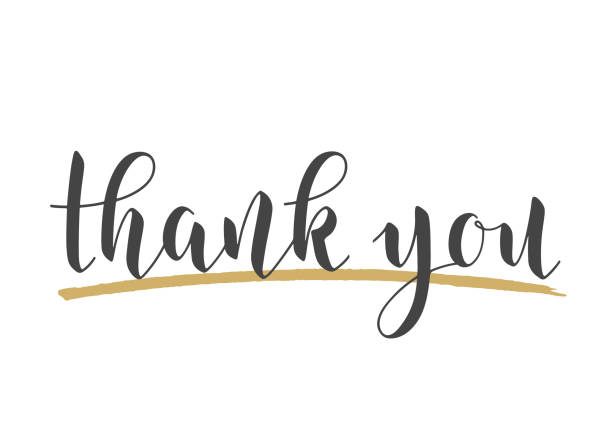